<img src='img/fastcamp_h.png'>

# 4강. Deep Learning from Basic Method with Keras

# 이번장에서 배우는 것들
 * 딥러닝의 간단한 역사
 * 퍼셉트론 구조 및 기본적 activation
 * Single-variable linear regression 및 Multi-variable linear regression
 * Logistic regression

# Short History; Deep Learning

<img src='img/03_00.png'>

# Perceptron

* 인간의 뉴런을 본따 1957년 코넬 항공 연구소에서 고안됨
* 선형 분류기의 일종
* 각 입력에서 각 가중치를 곱한 합의 크기로 결과를 활성화할지 비활성화할지 선택
<center><img src='img/03_03.png'></center>

# Perceptron의 구조

<center><img src='img/03_01.png'></center>

* input($x_n$): 외부에서 들어오는 입력, 보통 vector, matrix
* weight($w_n$): x와 곱해지는 가중치, DL에서 구해야하는 값
* bias($1$): 바이어스, 절편 값
* sigma: x와w의 곱 + bias의 합을 출력
* activation/step function: 해당 출력의 활성 여부를 결정

* $y = f(w^Tx+b)$

# 당시 대표적 Activation funtion
<br><br>

<center><img src='img/04_04.png'></center>

In [1]:
import numpy as np
import matplotlib.pylab as plt
def sigmoid(x):
    return 1./(1.+ np.exp(-x))

In [2]:
print(sigmoid(0))

0.5


In [3]:
print(sigmoid(-6))

0.0024726231566347743


In [4]:
print(sigmoid(6))

0.9975273768433653


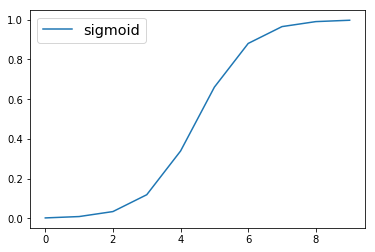

In [5]:
plt.plot(sigmoid(np.linspace(-6, 6, 10)), label='sigmoid')
plt.legend(fontsize='x-large')
plt.show()

In [6]:
def tanh(x):
    return np.tanh(x)

In [7]:
print(tanh(0))

0.0


In [8]:
print(tanh(-6))

-0.9999877116507956


In [9]:
print(tanh(6))

0.9999877116507956


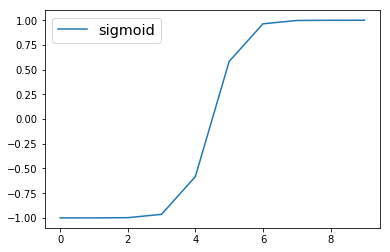

In [10]:
plt.plot(tanh(np.linspace(-6, 6, 10)), label='sigmoid')
plt.legend(fontsize='x-large')
plt.show()

In [11]:
def perceptron(X, W, b, activation):
    v = 0
    for x, w in zip(X, W):
        v += x*w
    v += b
    
    return activation(v)

In [12]:
X0 = [1, 1, 1]
W0 = [0, 0.5, 2]
B0 = 3
print('by X0:', perceptron(X0, W0, B0, sigmoid))

by X0: 0.995929862284104


In [13]:
X1= [2, 5, 2]
W1= [-2, -1.2, 0.5]
B1= 1.2
print('by X1:',perceptron(X1, W1, B1, tanh))

by X1: -0.9999996642345503


In [14]:
X2= [-2, 3, 1]
W2= [1.1, 0, 2]
B2= -3
print('by X3:',perceptron(X2, W2, B2, lambda x:x))

by X3: -3.2


# 선형 분류기란?

* $y$를 $x$의 차수가 2를 초과하지 않는 방정식으로 분리 할 수 있는 경우

<center><img src='img/04_01.png'></center>


# AND Gate

<table>
<tr>
<td>
    
| $x_1$ | $x_2$ | $y$ |
|:--------|:--------|:--------|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

</td><td>
    
 <img src='img/04_02.png'>
 
</td>
</tr>
</table>

* 모든 x 입력이 1일 때 y는 1을 출력하는 게이트 

# AND Gate 선형 분류 방정식 by 고등교육적 방식

$$ w_1 = 1 \nonumber $$
$$ w_2 = 1 \nonumber $$

\begin{align}
f(x_1, x_2) &= w_1x_1 + w_2x_2 + b &>= 0 \nonumber \\
&= x_1 + x_2 &>= -b \nonumber
\end{align}

\begin{align}
&= 1 + 1 &>= -b \nonumber \\
&= 2 &>= -b \nonumber \\
\end{align}

$$ b = -2 \nonumber $$
$$ f(x_1, x_2) = x_1 + x_2 - 2 >= 0 \nonumber $$

In [15]:
print(perceptron([0, 0], [1,1], -2, lambda x:x>=0)) #0, 0
print(perceptron([0, 1], [1,1], -2, lambda x:x>=0)) #0, 1
print(perceptron([1, 0], [1,1], -2, lambda x:x>=0)) #1, 0
print(perceptron([1, 1], [1,1], -2, lambda x:x>=0)) #1, 1

False
False
False
True


# OR Gate

<table>
<tr style="text-align:center;">
<td style="text-align:center;">
    
| $x_1$ | $x_2$ | $y$ |
|:--------|:--------|:--------|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |

</td><td>
    
 <center><img src='img/04_03.png'></center> 
 
</td>
</tr>
</table>

* 어떤 x 입력이 1일 때 y는 1을 출력하는 게이트

# OR Gate 선형 분류 방정식 by 고등교육적 방식

$$ w_1 = 1 \nonumber $$
$$ w_2 = 1 \nonumber $$

\begin{align}
f(x_1, x_2) &= w_1x_1 + w_2x_2 + b &>= 0 \nonumber \\
&= x_1 + x_2 &>= -b \nonumber
\end{align}

\begin{align}
&= 1 + 0 &>= -b \nonumber \\
&= 1 &>= -b \nonumber \\
\end{align}

$$ b = -1 \nonumber $$
$$ f(x_1, x_2) = x_1 + x_2 - 1 >= 0 \nonumber $$

In [16]:
print(perceptron([0, 0], [1,1], -1, lambda x:x>=0)) #0, 0
print(perceptron([0, 1], [1,1], -1, lambda x:x>=0)) #0, 1
print(perceptron([1, 0], [1,1], -1, lambda x:x>=0)) #1, 0
print(perceptron([1, 1], [1,1], -1, lambda x:x>=0)) #1, 1

False
True
True
True


# ML스러운 AND gate 정의

* 문제정의 

\begin{equation}
X = \begin{bmatrix}x^{(0)} \rightarrow (0 & 0) \\ x^{(1)} \rightarrow (0 & 1) \\ x^{(2)} \rightarrow (1 & 0) \\ x^{(3)} \rightarrow (1 & 1)\end{bmatrix}
Y = \begin{bmatrix}y^{(0)} \rightarrow 0 \\ y^{(1)} \rightarrow 0 \\ y^{(2)} \rightarrow 0 \\ y^{(3)} \rightarrow 1\end{bmatrix} \nonumber
\end{equation}
<br>
\begin{align}
h(x^{(n)}) &\simeq y^{(n)} \nonumber
\end{align}

* 목적함수 

\begin{align}
h(x^{(n)}) &\simeq y^{(n)} \nonumber \\
&= \sigma(w_1x_1 + w_2x_2 + w_0) \simeq y \nonumber
\end{align}

* 비용함수 

\begin{align}
J(\theta) = h(x^{(n)})와 y^{(n)}의 차이를 최소화 \nonumber \\
\end{align}

\begin{align}
MSE = J(\theta) = \sum_{i=1}^{n}\frac{(\hat{Y} - Y)^2}{n} \nonumber
\end{align}

# 몬테카를로 방법(MCM)

* 정말 확률은 맞아 떨어지는가?
 * 주사위에서 숫자 6이 나올 확률은 얼마일까?
   * 우리는 직관적으로 $P(X=6) = \frac{1}{6}$라는 사실을 알고 있음
   * 이미 배웠기 때문, 각 면이 나올 확률은 서로 독립으로 각 출현확률이 $\frac{1}{6} = 0.16666....$임을 알고 있음


<br><br>
* 그러나 진짜 그러한가?
 * 정말 6번 던지면 6이 한번만 나올것인가?

In [17]:
def dice():
    return np.random.randint(1, 7)

In [18]:
print(dice()) # 1번시행

1


In [19]:
print(dice()) # 2번시행

3


In [20]:
print(dice()) # 3번시행

3


In [21]:
print(dice()) # 4번시행

1


In [22]:
print(dice()) # 5번시행

5


In [23]:
print(dice()) # 6번시행

2


# 몬테카를로 방법(MCM)

* 위의 시행 방법은 틀렸는가?
 * 우리는 많이 던질 수록 시행이 uniform 분포로 근사될 것임을 알고 있음
 * 시행 숫자가 많아 질 수록 우리가 알고있는 분포로 근사될 것이다.
<br><br>
* 이것이 MCM의 핵심
 * "많이/오래 수행하면 정답에 가까워진다"

In [24]:
def do_dice(x):
    total = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0}
    for i in range(1, x + 1):
        total[dice()] += 1.0

    distrib = {}
    for key, count in total.items():
        distrib[key] = total[key]/float(sum(total.values()))
    return distrib

In [25]:
print (do_dice(1)[6]) # 1번 시행

0.0


In [26]:
print (do_dice(10)[6]) # 10번 시행

0.3


In [27]:
print (do_dice(100)[6]) # 100번 시행

0.12


In [28]:
print (do_dice(1000)[6]) # 1000번 시행

0.167


In [29]:
print (do_dice(10000)[6]) # 10000번 시행

0.173


In [30]:
print (do_dice(1000000)[6]) # 1000000번 시행

0.166808


In [31]:
# AND gate 문제 풀이 by MCM
X = [[0,0], [0,1], [1,0], [1,1]] #준비된 X 데이터
Y = [0, 0, 0, 1]                 #준비된 Y 데이터

def do_mcm(X, Y, count):
    W = [0, 0] #초기 weight는 기본값
    b = [0]    #초기 bias도 기본값

    loss = 1000000 #초기 loss도 나올 수 없는 큰값
    for _ in range(count):
        W_new = [np.random.uniform(-500, 500), np.random.uniform(-5, 5)] # W를 -500~500 범위에서 랜덤으로 2개 추출
        b_new = [np.random.uniform(-500, 500)]                           # b를 -500~500 범위에서 랜덤으로 1개 추출
        
        Hx = [perceptron(x, W_new, b_new[0], lambda x:x>=0) for x, y in zip(X, Y)] #기존 perceptron 함수에 신규 W와 b를 모든 X에 대해 실행
        loss_new = sum((hx - y)**2.0 for hx, y in zip(Hx, Y))/len(Y)               #모든 Y와 h(x)의 실제 loss를 얻어냄
        
        if loss > loss_new:                      #과거 loss보다 신규 loss가 더 작으면 더 우수해진 것
            print('현재 오차:', loss_new)        # 신규 w, b, loss를 사용하게 교체
            loss = loss_new
            W = W_new
            b = b_new
            
    return W, b

In [32]:
W, b = do_mcm(X, Y, 1)
print(perceptron([0, 0], W, b[0], lambda x:x>=0)) #0, 0
print(perceptron([0, 1], W, b[0], lambda x:x>=0)) #0, 1
print(perceptron([1, 0], W, b[0], lambda x:x>=0)) #1, 0
print(perceptron([1, 1], W, b[0], lambda x:x>=0)) #1, 0


현재 오차: 0.25
False
False
False
False


In [33]:
W, b = do_mcm(X, Y, 10)
print(perceptron([0, 0], W, b[0], lambda x:x>=0)) #0, 0
print(perceptron([0, 1], W, b[0], lambda x:x>=0)) #0, 1
print(perceptron([1, 0], W, b[0], lambda x:x>=0)) #1, 0
print(perceptron([1, 1], W, b[0], lambda x:x>=0)) #1, 0

현재 오차: 0.75
현재 오차: 0.25
False
False
False
False


In [34]:
W, b = do_mcm(X, Y, 100)
print(perceptron([0, 0], W, b[0], lambda x:x>=0)) #0, 0
print(perceptron([0, 1], W, b[0], lambda x:x>=0)) #0, 1
print(perceptron([1, 0], W, b[0], lambda x:x>=0)) #1, 0
print(perceptron([1, 1], W, b[0], lambda x:x>=0)) #1, 0

현재 오차: 0.75
현재 오차: 0.25
False
False
False
False


In [35]:
W, b = do_mcm(X, Y, 1000)
print(perceptron([0, 0], W, b[0], lambda x:x>=0)) #0, 0
print(perceptron([0, 1], W, b[0], lambda x:x>=0)) #0, 1
print(perceptron([1, 0], W, b[0], lambda x:x>=0)) #1, 0
print(perceptron([1, 1], W, b[0], lambda x:x>=0)) #1, 0

현재 오차: 0.75
현재 오차: 0.25
현재 오차: 0.0
False
False
False
True


In [36]:
W, b = do_mcm(X, Y, 10000)
print(perceptron([0, 0], W, b[0], lambda x:x>=0)) #0, 0
print(perceptron([0, 1], W, b[0], lambda x:x>=0)) #0, 1
print(perceptron([1, 0], W, b[0], lambda x:x>=0)) #1, 0
print(perceptron([1, 1], W, b[0], lambda x:x>=0)) #1, 0

현재 오차: 0.75
현재 오차: 0.25
현재 오차: 0.0
False
False
False
True


# Gradient Decent Method

* 우리는 언제까지고 이 짓(mcm)을 할 수는 없다.
* 문제가 요구하는 $w$의 범위가 어디까지 인지 알 수 없다
* 아무리 오래 돌려도 더 좋은 답이 있는지 없는지 알 수 없다
* 더 똑똑하게 $w$를 찾을 수 없을까?



### 동기

* 우리의 목적은 loss를 줄이는 방향으로 $w$를 효율적으로 찾아가는 것
* 우리는 등산을 하고 정상에서 하산 할 때, 어떻게 할까?
<br>
 1. 높은 곳에서 낮은 곳으로 걸어간다<br>
 2. 이때 우리는 10km 앞을 보고 내려가지는 않는다, 한 10m쯤 앞을 보고 내려간다.
 
<center><img src='img/04_05.png' width=30% height=30%></center>

# ML스러운 AND gate 풀이

* 주어진 데이터 상황

\begin{equation}
X = 
\begin{bmatrix}x^{(0)} \rightarrow (0 & 0) \\ x^{(1)} \rightarrow (0 & 1) \\ x^{(2)} \rightarrow (1 & 0) \\ x^{(3)} \rightarrow (1 & 1)\end{bmatrix}
Y = \begin{bmatrix}y^{(0)} \rightarrow 0 \\ y^{(1)} \rightarrow 0 \\ y^{(2)} \rightarrow 0 \\ y^{(3)} \rightarrow 1\end{bmatrix}
W^T = \begin{bmatrix} w^{(0)} \rightarrow ? \\ w^{(1)} \rightarrow ?\end{bmatrix}
b = 0 \nonumber
\end{equation}
<br>


* 모델
\begin{equation}
\hat{Y} = \sigma \left( \begin{bmatrix}0 & 0 \\ 0 & 1 \\ 1 & 0 \\ 1 & 1\end{bmatrix} \cdotp \begin{bmatrix} ?  \\ ?\end{bmatrix} + b \right) \nonumber
\end{equation}

* 비용 함수

\begin{equation}
MSE = J(\theta) = \sum_{i=1}^{n}\frac{(\hat{Y} - Y)^2}{n} \nonumber \\
\end{equation}

* Repeat until covergence ($\alpha$로 수렴 속도를 결정)

\begin{equation}
\theta_j := \theta_j - \alpha \cfrac {\partial}{\partial \theta_j}J(\theta) \nonumber \\
\end{equation}

In [37]:
#tensorflow를 이용한 and gate 풀이
import tensorflow as tf
import numpy as np

X = np.array([[0.,0], [0,1], [1,0], [1,1]])
Y = np.array([[0.], [0], [0], [1]])

In [38]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random.uniform([2, 1]))
b = tf.Variable(tf.zeros([1]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)

Instructions for updating:
Colocations handled automatically by placer.


In [39]:
#loss 및 gd 설정
diff = tf.losses.mean_squared_error(y, h)
a = 0.1
train_step = tf.train.GradientDescentOptimizer(a).minimize(diff)

Instructions for updating:
Use tf.cast instead.


In [40]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(500):
    batch_xs, batch_ys = X, Y
    _, loss = sess.run([train_step, diff], feed_dict={x: batch_xs, y: batch_ys})
    if i % 50 == 0:
        print('%d번 실행 후 오차:%f' % (i+1, np.sum(loss)))
    

accuracy = tf.reduce_mean(tf.cast(tf.equal(y, tf.cast(h > 0.5, tf.float32)), tf.float32))
print('정확도:', sess.run(accuracy, feed_dict={x: X, y: Y}))

1번 실행 후 오차:0.292959
51번 실행 후 오차:0.173142
101번 실행 후 오차:0.146433
151번 실행 후 오차:0.133025
201번 실행 후 오차:0.122631
251번 실행 후 오차:0.113861
301번 실행 후 오차:0.106307
351번 실행 후 오차:0.099722
401번 실행 후 오차:0.093924
451번 실행 후 오차:0.088770
정확도: 1.0


In [41]:
print("0,0 -> ", sess.run(h, feed_dict={x: np.array([[0,0]])})) # 0, 0 입력
print("0,1 -> ", sess.run(h, feed_dict={x: np.array([[0,1]])})) # 0, 1 입력
print("1,0 -> ", sess.run(h, feed_dict={x: np.array([[1,0]])})) # 1, 0 입력
print("1,1 -> ", sess.run(h, feed_dict={x: np.array([[1,1]])})) # 1, 1 입력

0,0 ->  [[0.10122747]]
0,1 ->  [[0.29025385]]
1,0 ->  [[0.30341125]]
1,1 ->  [[0.61263514]]


In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(loss='mse', optimizer=SGD(lr=0.1))
hist = model.fit(X,Y, epochs=500, verbose=0)

H = (model.predict(X) > 0.5).astype(np.float32)
for loss in hist.history['loss'][::50]:
    print('오차:', loss)
print('정확도:', np.mean(np.equal(H, Y)))


Instructions for updating:
Use tf.cast instead.


Using TensorFlow backend.


오차: 0.27505069971084595
오차: 0.24191613495349884
오차: 0.21718478202819824
오차: 0.1954801380634308
오차: 0.17579741775989532
오차: 0.1586686372756958
오차: 0.1442415416240692
오차: 0.13216543197631836
오차: 0.12198519706726074
오차: 0.1133078932762146
정확도: 1.0


In [43]:
print("0,0 -> ", model.predict(np.array([[0,0]]))) # 0, 0 입력
print("0,1 -> ", model.predict(np.array([[0,1]]))) # 0, 1 입력
print("1,0 -> ", model.predict(np.array([[1,0]]))) # 1, 0 입력
print("1,1 -> ", model.predict(np.array([[1,1]]))) # 1, 1 입력

0,0 ->  [[0.14957769]]
0,1 ->  [[0.33469367]]
1,0 ->  [[0.30678582]]
1,1 ->  [[0.55865276]]


# Keras의 세계로
<br>
<center><img src='img/04_06.png' width=50% height=50%></center>

* You have just found Keras.
* Keras는 python으로 작성된 고수준 딥러닝 API 및 라이브러리
* Tensorflow, CNTK, Theano를 Keras의 문법으로 실행 할 수 있음
* 쉽고 빠른 프로토타이핑 가능 (사용자 편의성, 모듈성 및 확장성)
* CNN과 RNN은 물론, 둘의 조합도 지원
* CPU 및 GPU 지원
* tensorflow 2.0 공식 고수준 API

# Keras에서 Model을 만들기 위한 5가지 필수 요소

### 데이터 $X$
---------------------------
우리가 해결하고 싶은 문제군<br>
과거 경험이나 용례<br>
수학으로 치면 정의역에 해당 함

### 정답 데이터 $Y$
---------------------------
문제군과 페어가 되는 정답군<br>
수학으로 치면 치역에 해당 함


### 모델
------------------------------
데이터 $X$를 정답 데이터 $Y$로 예측하기 위한 딥러닝 수식<br>
모델은 여러 layer로 구성되어 있으며 일반적으로 layer를 쌓는다고 표현

### Loss 함수
------------------------------
모델이 예측한 $\hat{Y}$와 실제 정답 $Y$의 차이를 통해 현재 모델이 얼마나 우수한지를 평가

### Optimizer
-----------------------------
측정된 Loss를 어떤 방식의 GD로 줄여갈건지를 결정

# Model의 핵심 2가지 필수 요소 + 1

### model.Fit
------------------------------
위의 사항이 고려된 model에 데이터 $X$, $Y$를 입력하여 학습 시키는 함수

### model.Predict
-------------------------
임의의 $X$ 데이터에 대하여 $\hat{Y}$를 예측

### model.Evaluate
-----------------------------
완성된 모델이 처음보는 데이터 $X$, $Y$에 대해서 어느정도 정확도를 가지는지 측정


In [44]:
import keras #keras import
from keras.models import Sequential #모델을 사용할 수 있게 해주는 import
from keras.layers import Dense, Activation #Dense와 step function을 사용할 수 있게 해주는 import
from keras.optimizers import SGD # gd를 사용할 수 있게 해주는 import

model = Sequential() #모델 선언

In [45]:
model.add(Dense(1, input_shape=(2,), activation='sigmoid')) #model에 perceptron 구조 설정
                                                            #Dense layer를 1장 쌓음


model.compile(loss='mse', optimizer=SGD(lr=0.1)) #model에 loss funtion은 MSE로
                                                 #optimizer는 SGD ,alpha는 0.1로 설정

    
hist = model.fit(X,Y, epochs=500, verbose=0)   #X, Y에 대하여 해당 설정으로 500 epochs 수행

In [46]:
H = (model.predict(X) > 0.5).astype(np.float32) #X에 대하여 예측 Y'를 생성 한 뒤 실제 Y와 정확도 비교
print('정확도:', np.mean(np.equal(H, Y)))

정확도: 1.0


# Gate model
<center><img src='img/04_07.png' width=50% height=50%></center>

* 2개의 입력
* 1개의 출력

# 집값 예측 - Multi-variable linear regression

* from kaggle https://www.kaggle.com/c/house-prices-advanced-regression-techniques
* 집에 대한 80가지 컬럼과 가격을 나타내는 데이터
* 1460개의 집에 대한 데이터와 가격이 주어짐
* 최대한 정확하게 예측하는 문제
* 완전 정확하게 예측할 수는 없으므로 평가는 loss가 적은 순위로 부여

In [47]:
import pandas as pd
data = pd.read_csv('data/house-prices/train.csv', sep=',')
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 데이터 정제

* 데이터 컬럼이 너무 많고, 우리의 목적은 kaggle에 나가서 순위권에 드는 것이 아님!
* 카테고리형 데이터를 최대한 지우고, 숫자형 데이터만을 축약해본다.
* 단, saleType은 salePrice (Y)를 결정할 수도 있어보이는 변수니 컬럼형으로 변화 시킴
* 컬럼 중 빈값을 포함하고 있는 row가 있다면 과감하게 제거
* 상관분석을 고려하여 중요해보이는 컬럼 10개 정도만을 가지고 시도해보자

In [49]:
df = data[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
      'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
      'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
      'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
      'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
      'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SalePrice']]
df.head(5)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,8450,7,5,2003,2003,706,0,150,856,856,...,61,0,0,0,0,0,2,2008,WD,208500
1,9600,6,8,1976,1976,978,0,284,1262,1262,...,0,0,0,0,0,0,5,2007,WD,181500
2,11250,7,5,2001,2002,486,0,434,920,920,...,42,0,0,0,0,0,9,2008,WD,223500
3,9550,7,5,1915,1970,216,0,540,756,961,...,35,272,0,0,0,0,2,2006,WD,140000
4,14260,8,5,2000,2000,655,0,490,1145,1145,...,84,0,0,0,0,0,12,2008,WD,250000


In [50]:
#saleType 카테고리형 변수를 컬럼형 변수로 변경
saleType_onehot = pd.get_dummies(df['SaleType'])
df = df.drop('SaleType', axis = 1)
df = df.join(saleType_onehot)
df = df.join(df.pop('SalePrice'))
df.head(5)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,SalePrice
0,8450,7,5,2003,2003,706,0,150,856,856,...,0,0,0,0,0,0,0,0,1,208500
1,9600,6,8,1976,1976,978,0,284,1262,1262,...,0,0,0,0,0,0,0,0,1,181500
2,11250,7,5,2001,2002,486,0,434,920,920,...,0,0,0,0,0,0,0,0,1,223500
3,9550,7,5,1915,1970,216,0,540,756,961,...,0,0,0,0,0,0,0,0,1,140000
4,14260,8,5,2000,2000,655,0,490,1145,1145,...,0,0,0,0,0,0,0,0,1,250000


In [51]:
# row에 빈값이 있으면 제거
print('원본 row수:', len(df))
df = df.dropna()
print('변경 row수:', len(df))

원본 row수: 1460
변경 row수: 1379


<center><img src='img/04_08.png' width=40% height=40%></center>

# 상관분석이란 무엇인가?

* $x_n$이 주어질 때, 지정한 변수간, 예를들어 $x_1$과 $x_2$이 증가나 감소 방향이<br> 어떤 선형적 관계를 가지고 있는지 분석하는 방법
* 예를 들면, 집값, 평형, 화장실 개수의 경우 서로 선형적 증가 관계가 있을 것이라고 예측 할 수 있음

<br>

* -1 부터 1의 결과를 출력하며 다음과 같은 관계가 있음
 * 0에 가까울수록 서로 독립적
 * 1에 가까울수록 서로 양의 상관관계
 * -1에 가까울수록 서로 음의 상관관계


In [52]:
# 집 가격에 대하여 상관관계 분석을 한 뒤 음양의 상관관계에 관계 없이 0.5 이상의 상관을 가지고 있으면 추출
cor = df.corr()
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

OverallQual     0.787228
YearBuilt       0.507584
YearRemodAdd    0.505434
TotalBsmtSF     0.603583
1stFlrSF        0.594935
GrLivArea       0.708172
FullBath        0.556550
TotRmsAbvGrd    0.538309
GarageCars      0.637095
GarageArea      0.608405
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [53]:
df = df[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
      'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']]
df.head(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


In [54]:
# 학습셋을 구성하기 위하여 자료의 70%를 학습셋, 30%를 테스트셋으로 구분
train = df.sample(frac=0.7)
test = df.drop(train.index)
print(len(df), len(train), len(test))

1379 965 414


In [55]:
#각 데이터를 x와 y로 구분
train_x, train_y = np.split(train, [-1], axis=1)
test_x, test_y = np.split(test, [-1], axis=1)
print(train_x.shape, train_y.shape)

(965, 10) (965, 1)


In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(1, input_shape=(10,), activation='linear'))
model.compile(loss='mse', optimizer=SGD(lr=0.01))
hist = model.fit(train_x.as_matrix(), train_y.as_matrix(), epochs=500, verbose=1)

Epoch 1/500
 32/965 [..............................] - ETA: 2s - loss: 45056106496.0000

C:\Users\sons\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


965/965 [==============================] - 0s 145us/step - loss: nan       
Epoch 2/500
965/965 [==============================] - 0s 43us/step - loss: nan
Epoch 3/500
965/965 [==============================] - 0s 42us/step - loss: nan
Epoch 4/500
965/965 [==============================] - 0s 42us/step - loss: nan
Epoch 5/500
965/965 [==============================] - 0s 42us/step - loss: nan
Epoch 6/500
965/965 [==============================] - 0s 43us/step - loss: nan
Epoch 7/500
965/965 [==============================] - 0s 44us/step - loss: nan
Epoch 8/500
965/965 [==============================] - 0s 50us/step - loss: nan
Epoch 9/500
965/965 [==============================] - 0s 47us/step - loss: nan
Epoch 10/500
965/965 [==============================] - 0s 47us/step - loss: nan
Epoch 11/500
965/965 [==============================] - 0s 45us/step - loss: nan
Epoch 12/500
965/965 [==============================] - 0s 42us/step - loss: nan
Epoch 13/500
965/965 [===================

965/965 [==============================] - 0s 40us/step - loss: nan
Epoch 203/500
965/965 [==============================] - 0s 40us/step - loss: nan
Epoch 204/500
965/965 [==============================] - 0s 44us/step - loss: nan
Epoch 205/500
965/965 [==============================] - 0s 41us/step - loss: nan
Epoch 206/500
965/965 [==============================] - 0s 56us/step - loss: nan
Epoch 207/500
965/965 [==============================] - 0s 45us/step - loss: nan
Epoch 208/500
965/965 [==============================] - 0s 43us/step - loss: nan
Epoch 209/500
965/965 [==============================] - 0s 43us/step - loss: nan
Epoch 210/500
965/965 [==============================] - 0s 43us/step - loss: nan
Epoch 211/500
965/965 [==============================] - 0s 47us/step - loss: nan
Epoch 212/500
965/965 [==============================] - 0s 43us/step - loss: nan
Epoch 213/500
965/965 [==============================] - 0s 41us/step - loss: nan
Epoch 214/500
965/965 [=======

965/965 [==============================] - 0s 41us/step - loss: nan
Epoch 402/500
965/965 [==============================] - 0s 43us/step - loss: nan
Epoch 403/500
965/965 [==============================] - 0s 43us/step - loss: nan
Epoch 404/500
965/965 [==============================] - 0s 44us/step - loss: nan
Epoch 405/500
965/965 [==============================] - 0s 44us/step - loss: nan
Epoch 406/500
965/965 [==============================] - 0s 44us/step - loss: nan
Epoch 407/500
965/965 [==============================] - 0s 42us/step - loss: nan
Epoch 408/500
965/965 [==============================] - 0s 42us/step - loss: nan
Epoch 409/500
965/965 [==============================] - 0s 41us/step - loss: nan
Epoch 410/500
965/965 [==============================] - 0s 43us/step - loss: nan
Epoch 411/500
965/965 [==============================] - 0s 42us/step - loss: nan
Epoch 412/500
965/965 [==============================] - 0s 47us/step - loss: nan
Epoch 413/500
965/965 [=======

# 잘되지 않는 이유는 무엇일까?

* 해당 모델은 다음과 같은 수식으로 정의 될 수 있음

\begin{align}
h(x_1, x_2, x_3 \dots x_{10}) = w_1x_1 + w_2x_2 + w_3x_3 + \dots + w_{10}x_{10} + b \nonumber
\end{align}

* 각 $w$들은 대략 아주 크지 않은 숫자의 범위에서 초기값을 가짐
* 예를 들어 다음과 같음

\begin{align}
h(x_1, x_2, x_3 \dots x_{10}) &= 0.1x_1 -2.2x_2 + 5.3x_3 + \dots -5.3x_{10} + 0.5 \nonumber
\end{align}

* 하지만, 어떤 데이터들의 경우 x간의 범위 차이가 수십배, 수천배가 날 수 있음
* 예를들어 다음과 같음

\begin{align}
h(x_1, x_2, x_3 \dots x_{10}) &= w_10.5 + w_{2}2000 + w_{3}0.002312 + \dots + w_{10}123125412 -2.432 \nonumber
\end{align}

* 수천배 이상 스케일을 가진 x의 weight가 반복적으로 증가하여 컴퓨터의 계산 범위를 초과하면 nan을 출력 할 수 있음
* 이런 현상을 gradient exploding이라고 함
* 여러가지 해결책 중 간단한 방법은 변수들의 스케일을 조정해주면 됨

# Min Max Normalize

* 임의의 스케일을 가진 데이터에서 같은 도메인 기준으로 가장 작은 값과 가장 큰 값을 이용하여 0~1으로 범위를 변경하는 방법

$$ norm({x_i}) = \frac{x_i - x_{min}}{x_{max} - x_{min}} \nonumber $$

In [57]:
def minmax_norm(x):
    max_x = np.max(x)
    min_x = np.min(x)
    
    return (x - min_x)/(max_x-min_x)

In [58]:
print(minmax_norm([1,2,3,4,5]))

[0.   0.25 0.5  0.75 1.  ]


In [59]:
#x의 데이터를 출력해봄
train_x.head(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
1440,6,1922,1994,588,1423,2555,2,11,2,672
1235,5,1914,1950,747,892,1784,1,9,1,180
214,6,1977,1977,689,689,1392,1,6,1,299
234,6,2002,2002,860,860,1960,2,8,2,440
1017,8,1984,1984,1220,1360,1360,1,4,2,565


In [60]:
#norm된 x의 데이터를 출력해봄
train_x.apply(minmax_norm, axis=0).head(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
1440,0.500,0.325581,0.733333,0.096236,0.231547,0.406802,0.666667,0.888889,0.333333,0.406995
1235,0.375,0.263566,0.000000,0.122259,0.106723,0.258647,0.333333,0.666667,0.000000,0.015898
214,0.500,0.751938,0.450000,0.112766,0.059003,0.183321,0.333333,0.333333,0.000000,0.110493
234,0.500,0.945736,0.866667,0.140753,0.099201,0.292467,0.666667,0.555556,0.333333,0.222576
1017,0.750,0.806202,0.566667,0.199673,0.216737,0.177171,0.333333,0.111111,0.333333,0.321940


In [61]:
#y의 데이터를 출력해봄
train_y.head(5)

,SalePrice
1440,191000
1235,138887
214,161750
234,216500
1017,187500


In [62]:
#norm된 y의 데이터를 출력해봄
train_y.apply(minmax_norm, axis=0).head(5)

,SalePrice
1440,0.216328
1235,0.143918
214,0.175686
234,0.251760
1017,0.211465


In [63]:
#MinMaxScaler는 각 변수를 row별로 분석하여 최대 값으로 현재 값을 나눠주어 0~1사이로 값을 변경함
from sklearn.preprocessing import MinMaxScaler
minmaxer_x = MinMaxScaler()
minmaxer_y = MinMaxScaler()
minmaxer_x.fit(train_x)
minmaxer_y.fit(train_y)

C:\Users\sons\Anaconda3\envs\py3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\sons\Anaconda3\envs\py3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [64]:
columns_x = train_x.columns
columns_y = train_y.columns
train_x = minmaxer_x.transform(train_x)
train_x = pd.DataFrame(train_x, columns=columns_x)
train_y = minmaxer_y.transform(train_y)
train_y = pd.DataFrame(train_y, columns=columns_y)

In [65]:
#x의 데이터를 출력해봄
train_x.head(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,0.500,0.325581,0.733333,0.096236,0.231547,0.406802,0.666667,0.888889,0.333333,0.406995
1,0.375,0.263566,0.000000,0.122259,0.106723,0.258647,0.333333,0.666667,0.000000,0.015898
2,0.500,0.751938,0.450000,0.112766,0.059003,0.183321,0.333333,0.333333,0.000000,0.110493
3,0.500,0.945736,0.866667,0.140753,0.099201,0.292467,0.666667,0.555556,0.333333,0.222576
4,0.750,0.806202,0.566667,0.199673,0.216737,0.177171,0.333333,0.111111,0.333333,0.321940


In [66]:
#y의 데이터를 출력해봄
train_y.head(5)

,SalePrice
0,0.216328
1,0.143918
2,0.175686
3,0.251760
4,0.211465


In [67]:
#똑같이 모델을 다시 돌려본다
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(1, input_shape=(10,), activation='linear'))
model.compile(loss='mse', optimizer=SGD(lr=0.01))
hist = model.fit(train_x.as_matrix(), train_y.as_matrix(), epochs=500, verbose=1)

C:\Users\sons\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/500
965/965 [==============================] - 0s 165us/step - loss: 0.0878
Epoch 2/500
965/965 [==============================] - 0s 43us/step - loss: 0.0809
Epoch 3/500
965/965 [==============================] - 0s 48us/step - loss: 0.0757
Epoch 4/500
965/965 [==============================] - 0s 39us/step - loss: 0.0706
Epoch 5/500
965/965 [==============================] - 0s 45us/step - loss: 0.0660
Epoch 6/500
965/965 [==============================] - 0s 39us/step - loss: 0.0618
Epoch 7/500
965/965 [==============================] - 0s 39us/step - loss: 0.0578
Epoch 8/500
965/965 [==============================] - 0s 44us/step - loss: 0.0541
Epoch 9/500
965/965 [==============================] - 0s 41us/step - loss: 0.0510
Epoch 10/500
965/965 [==============================] - 0s 44us/step - loss: 0.0480
Epoch 11/500
965/965 [==============================] - 0s 101us/step - loss: 0.0451
Epoch 12/500
965/965 [==============================] - 0s 48us/step - loss: 0.0425

965/965 [==============================] - 0s 40us/step - loss: 0.0034
Epoch 195/500
965/965 [==============================] - 0s 43us/step - loss: 0.0034
Epoch 196/500
965/965 [==============================] - 0s 42us/step - loss: 0.0034
Epoch 197/500
965/965 [==============================] - 0s 42us/step - loss: 0.0034
Epoch 198/500
965/965 [==============================] - 0s 45us/step - loss: 0.0034
Epoch 199/500
965/965 [==============================] - 0s 40us/step - loss: 0.0034
Epoch 200/500
965/965 [==============================] - 0s 40us/step - loss: 0.0034
Epoch 201/500
965/965 [==============================] - 0s 47us/step - loss: 0.0034
Epoch 202/500
965/965 [==============================] - 0s 48us/step - loss: 0.0034
Epoch 203/500
965/965 [==============================] - 0s 49us/step - loss: 0.0034
Epoch 204/500
965/965 [==============================] - 0s 44us/step - loss: 0.0034
Epoch 205/500
965/965 [==============================] - 0s 41us/step - loss: 0

Epoch 386/500
965/965 [==============================] - 0s 44us/step - loss: 0.0030
Epoch 387/500
965/965 [==============================] - 0s 40us/step - loss: 0.0030
Epoch 388/500
965/965 [==============================] - 0s 42us/step - loss: 0.0030
Epoch 389/500
965/965 [==============================] - 0s 45us/step - loss: 0.0030
Epoch 390/500
965/965 [==============================] - 0s 45us/step - loss: 0.0030
Epoch 391/500
965/965 [==============================] - 0s 45us/step - loss: 0.0030
Epoch 392/500
965/965 [==============================] - 0s 44us/step - loss: 0.0030
Epoch 393/500
965/965 [==============================] - 0s 42us/step - loss: 0.0030
Epoch 394/500
965/965 [==============================] - 0s 43us/step - loss: 0.0030
Epoch 395/500
965/965 [==============================] - 0s 40us/step - loss: 0.0030
Epoch 396/500
965/965 [==============================] - 0s 40us/step - loss: 0.0030
Epoch 397/500
965/965 [==============================] - 0s 40us/

In [68]:
idx = 9
x = minmaxer_x.transform(np.expand_dims(test_x.as_matrix()[idx], axis=0))
y = model.predict(x)
print('정답:', test_y.as_matrix()[idx][0], ', 예측:', minmaxer_y.inverse_transform(y)[0][0])
print('차이:',  test_y.as_matrix()[idx][0] - minmaxer_y.inverse_transform(y)[0][0])

정답: 256300 , 예측: 278507.38
차이: -22207.375


C:\Users\sons\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\sons\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\sons\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


C:\Users\sons\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\sons\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


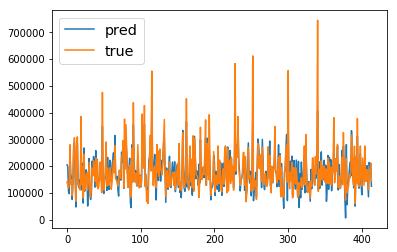

In [69]:
xs = minmaxer_x.transform(test_x.as_matrix())
ys = minmaxer_y.inverse_transform(model.predict(xs))
plt.plot(ys, label='pred')
plt.plot(test_y.as_matrix(), label='true')
plt.legend(fontsize='x-large')
plt.show()

# 시험 합격 - Logistic Regression

* 시험 합격 결과에 대한 2가지(잠잔 시간, 공부한 시간)이 주어짐
* 100개의 합격 결과 X와 2가지 정보 Y가 주어짐
* 합격 결과는 0/1 binary classification으로 나타낼 수 있음

# Regression to Classification

* $w^Tx = y$에 sigmoid activation을 씌우면 y는 0~1의 사의값을 가지게 됨
* threshold라는 기준보다 크면 1, 작으면 0으로 회귀를 분류 문제로 변경 가능

<center><img src='img/04_09.png' width=50% height=50%></center>

In [70]:
import pandas as pd
df = pd.read_csv('data/exam-pass/data_classification.csv', sep=',', names=['Studied', 'Slept', 'Passed'])
df.head(5)

,Studied,Slept,Passed
0,4.855064,9.639962,1
1,8.625440,0.058927,0
2,3.828192,0.723199,0
3,7.150955,3.899420,1
4,6.477900,8.198181,1


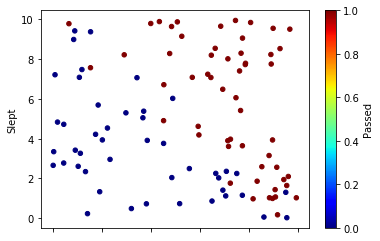

In [71]:
df.plot.scatter(x='Studied', y='Slept', c='Passed', colormap='jet')

In [72]:
# 학습셋을 구성하기 위하여 자료의 70%를 학습셋, 30%를 테스트셋으로 구분
train = df.sample(frac=0.7)
test = df.drop(train.index)
print(len(df), len(train), len(test))

100 70 30


In [86]:
#모델을 돌려본다
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Lambda
from keras.optimizers import SGD
from keras import backend as K

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(loss='mse', optimizer=SGD(lr=0.01), metrics=['accuracy'])
hist = model.fit(train.iloc[:,:2], train.iloc[:,2], epochs=500, verbose=0)

In [107]:
pred = (model.predict(test.iloc[:,:2]) > 0.5 ).astype('int')[:,0]
print ('정확도:', np.sum(test.iloc[:,2] == pred)/float(len(pred)))

정확도: 0.7
